This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.07260343]
 [-0.27343908]
 [ 0.6888457 ]], shape=(3, 1), dtype=float32)


In [5]:
x = tf.random.uniform(shape=(4, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.03746736]
 [0.65718627]
 [0.37103188]
 [0.99144936]], shape=(4, 1), dtype=float32)


**NumPy arrays are assignable**

In [7]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)

[[0. 1.]
 [1. 1.]]


**Creating a TensorFlow variable**

In [10]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.8135775 ],
       [ 0.41317326],
       [-0.9840993 ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [11]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [12]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [13]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [15]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

print(a,b,c,d,e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


#### A second look at the GradientTape API

**Using the `GradientTape`**

In [44]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [45]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [46]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [47]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [48]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [49]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

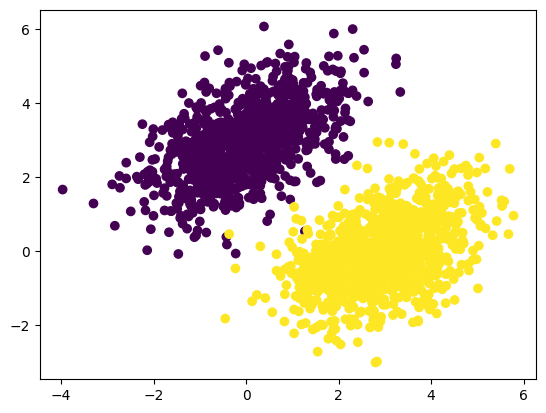

In [50]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [51]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [52]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [53]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [54]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [55]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.5458
Loss at step 1: 0.3655
Loss at step 2: 0.1579
Loss at step 3: 0.1284
Loss at step 4: 0.1175
Loss at step 5: 0.1091
Loss at step 6: 0.1016
Loss at step 7: 0.0949
Loss at step 8: 0.0887
Loss at step 9: 0.0831
Loss at step 10: 0.0779
Loss at step 11: 0.0733
Loss at step 12: 0.0690
Loss at step 13: 0.0651
Loss at step 14: 0.0616
Loss at step 15: 0.0584
Loss at step 16: 0.0555
Loss at step 17: 0.0528
Loss at step 18: 0.0504
Loss at step 19: 0.0482
Loss at step 20: 0.0461
Loss at step 21: 0.0443
Loss at step 22: 0.0426
Loss at step 23: 0.0411
Loss at step 24: 0.0397
Loss at step 25: 0.0384
Loss at step 26: 0.0373
Loss at step 27: 0.0362
Loss at step 28: 0.0353
Loss at step 29: 0.0344
Loss at step 30: 0.0336
Loss at step 31: 0.0329
Loss at step 32: 0.0322
Loss at step 33: 0.0316
Loss at step 34: 0.0311
Loss at step 35: 0.0306
Loss at step 36: 0.0301
Loss at step 37: 0.0297
Loss at step 38: 0.0293
Loss at step 39: 0.0290


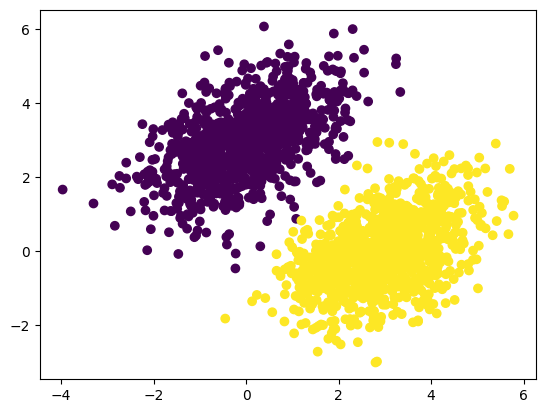

In [56]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

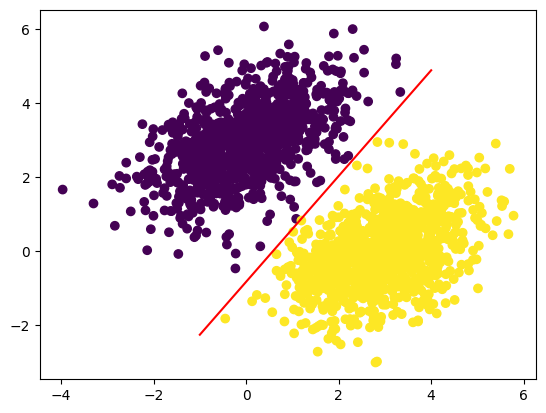

In [57]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [58]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [59]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [60]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [61]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [62]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [63]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [65]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [66]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 593us/step - loss: 3.6021 - binary_accuracy: 0.6950
Epoch 2/5
16/16 [==============================] - 0s 451us/step - loss: 3.3368 - binary_accuracy: 0.7085
Epoch 3/5
16/16 [==============================] - 0s 487us/step - loss: 3.1201 - binary_accuracy: 0.7190
Epoch 4/5
16/16 [==============================] - 0s 485us/step - loss: 2.9142 - binary_accuracy: 0.7255
Epoch 5/5
16/16 [==============================] - 0s 476us/step - loss: 2.7200 - binary_accuracy: 0.7355


In [67]:
history.history

{'loss': [3.6020936965942383,
  3.336838960647583,
  3.120084524154663,
  2.914219617843628,
  2.719970464706421],
 'binary_accuracy': [0.6949999928474426,
  0.7085000276565552,
  0.718999981880188,
  0.7254999876022339,
  0.7354999780654907]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [68]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 0s 1ms/step - loss: 0.1115 - binary_accuracy: 0.9329 - val_loss: 0.1041 - val_binary_accuracy: 0.9833
Epoch 2/5
88/88 [==============================] - 0s 645us/step - loss: 0.0699 - binary_accuracy: 0.9621 - val_loss: 0.0453 - val_binary_accuracy: 0.9983
Epoch 3/5
88/88 [==============================] - 0s 627us/step - loss: 0.0729 - binary_accuracy: 0.9586 - val_loss: 0.0395 - val_binary_accuracy: 0.9883
Epoch 4/5
88/88 [==============================] - 0s 606us/step - loss: 0.0689 - binary_accuracy: 0.9621 - val_loss: 0.0381 - val_binary_accuracy: 0.9933
Epoch 5/5
88/88 [==============================] - 0s 605us/step - loss: 0.0672 - binary_accuracy: 0.9693 - val_loss: 0.0278 - val_binary_accuracy: 0.9983


### Inference: Using a model after training

In [69]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 1ms/step
[[ 0.69681764]
 [ 0.88503015]
 [-0.09908566]
 [ 0.00356492]
 [-0.03931585]
 [ 0.8925289 ]
 [ 0.03015503]
 [-0.02071086]
 [ 0.14987028]
 [ 0.22726041]]


## Summary